# 08 Classification - K-Nearest Neighbors 

## Imports

In [34]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Use the built-in iris dataset to build a function that classifies each data point according to one or more of its features.
* What are the features?
* What is the target variable?
* How many labels does the target variable have? Is it binary?

In [3]:
# Load iris dataset from the datasets module:
iris = datasets.load_iris()

# Create a pandas dataframe from iris. Grab the column names from iris.feature_names, and target from iris.target:
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target

## EDA:

* Check for nulls
* Run descriptive statistics

In [4]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


## Fix Column Names to Remove Spaces

In [5]:
# Take a look at the columns in their original form using a list comprehension:
[col for col in irisdf.columns]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [6]:
# Experiment with replacing the spaces with `'_'` underscores before assigning the list back to columns:
[col.replace(' ','_') for col in irisdf.columns]

['sepal_length_(cm)',
 'sepal_width_(cm)',
 'petal_length_(cm)',
 'petal_width_(cm)',
 'target']

In [7]:
# If all is well, save it assign your new list back to `irisdf.columns`:
irisdf.columns = [col.replace(' ','_') for col in irisdf.columns]

In [8]:
# Check descriptive statistics
irisdf.describe()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Plot the samples petal length & width with color labels:
*  Let's apply a color map to the target column so that we can visually see lables: 'ctarget'
 * Learn more about using `.apply` with `lambda` functions here: http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html

In [9]:
# Define the colormap dictionary (dictionaries are a great way of replacing values in a Series with`.apply()`)
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])

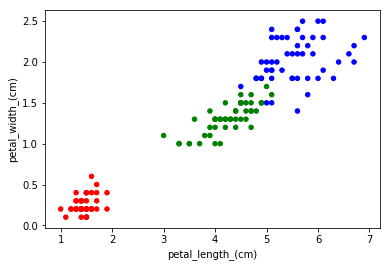

In [10]:
# Use pandas to plot the petal length against width, using the target's label as the color to see patterns
irisdf.plot('petal_length_(cm)', 'petal_width_(cm)', kind='scatter', c=irisdf.ctarget)

## Analyze Correlations:
*  Which features have the highest correlation with the target variable? Should you start with using the highest correlated feature as a predictor? 

In [11]:
# Output in a pandas dataframe a correlation matrix with rows sorted according to features most
# highly correlated with the target column:
pd.DataFrame(irisdf.corr()).sort_values('target', ascending=False)

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
target,0.782561,-0.419446,0.949043,0.956464,1.000000
petal_width_(cm),0.817954,-0.356544,0.962757,1.000000,0.956464
petal_length_(cm),0.871754,-0.420516,1.000000,0.962757,0.949043
sepal_length_(cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width_(cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446


---

# Build a Classifier
* Start with `'petal_length_(cm)'`
* What's a good cut off value, given the plot you saw above?

In [19]:
# Build a function that classifies each data point accordingn to criteria you set for one feature: my_classifier

def my_binary_classifier(row):
    """Function takes in a row of a dataframe and assigns a label of 0 or 1 based on its value"""
    if row['petal_length_(cm)'] < 2:
        return 0
    else:
        return 1

# Create a Series of predictions using your classifier: predictions
predictions = irisdf.apply(my_binary_classifier, axis=1)

In [18]:
# Let's apply the colormap to the predictions series to give it the same great color as 'ctarget': 'cpredictions'
cpredictions = predictions.apply(lambda x: cmap[str(x)])

### Plot the original clustering of labels with the predictions by using 'ctarget' and 'cpredictions' to visually evaluate our 'model'. How well did our prediction criteria do?

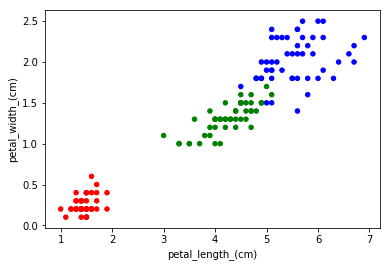

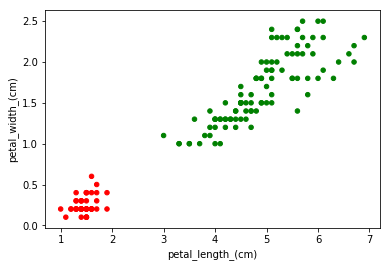

In [20]:
# Use pandas plot on the dataframe to look at label by petal length and width.
irisdf.plot('petal_length_(cm)', 'petal_width_(cm)', kind='scatter', c=irisdf.ctarget)
irisdf.plot('petal_length_(cm)', 'petal_width_(cm)', kind='scatter', c=cpredictions)

### Calculate the accuracy of your prediction by creating a function to calculate total correct predictions over total samples:

In [26]:
# Let's see the total true / total number of samples:
def prediction_accuracy(df_actuals, preds):
    """This function takes in the target values and 
    a Series of predictions and returns the total correct
    over total samples as a decimal"""
    count = 0
    if len(df_actuals) == len(preds):
        n = len(df_actuals)
        for i in range(0,n):
            if df_actuals[i]==preds[i]:
                count+=1
        return count/n
    else:
        print('The series are not the same length')

In [27]:
# Output the prediction accuracy for your classifier
prediction_accuracy(irisdf.ctarget, cpredictions)

0

## BONUS:
### We've predicted using petal length < 2 cm, let's create a more sophisticated approach:
* Either create a function that generalizes to allow a user to define the feature and cut off value.
* Or, create a multi-label function that assigns 0, 1 and 2 labels, depending on the cut-off values.

* Once you have finished, output your predictions and calculate your accuracy.

---


# K-Nearest Neighbors in Action:

* Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* `class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)`

In [36]:
# import sklearn KNeighborsClassifier:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Load iris again if you have altered the original, otherwise, you don't have to reload:
iris = datasets.load_iris()

In [38]:
# `n_neighbors` is our parameter of interest in KNN. We'll tune this parameter to improve prediction accuracy.
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Create model:
X = iris.data[:,2:]
y = iris.target
# Fit knn to our data columns 2:4 against the target
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Compare predictions vs. actuals and calculate accuracy using `knn.score()`

In [39]:
y_preds = knn.predict(X)

print('Predictions:', y_preds)
print('Actuals:', y)
print('Accuracy Score:', knn.score(X, y))

('Predictions:', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))
('Actuals:', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 

## Cross Validation:

* Splitting the data into training and testing data
 * See documentation http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* Cross validation with `cross_val_score`:
 * `cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')`
* Benefits of cross-validation:
  - More reliable estimate of out-of-sample performance than train/test split alone
  - Reduced variance on a single trial of a train/test split
* Great for:
  - Selecting tuning parameters
  - Choosing between models
  - Selecting features
* Drawbacks of cross-validation:
  - Can be computationally expensive when data is very large or the model training is slow

In [40]:
from sklearn.model_selection import cross_val_score, train_test_split

In [41]:
# Split the data into training and testing with a 0.33 test size 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((100, 2), (50, 2), (100,), (50,))


In [42]:
# Fit the model onto the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
print('Testing Data Score:', knn.score(X_test, y_test), ',', 'Training Data Score:', knn.score(X_train, y_train))
print('Cross Validated Scores on 3 Folds:', cross_val_score(knn, X_test, y_test, cv=3))
print("Mean Cross Validated Score Across 3 Folds:", cross_val_score(knn, X_test, y_test, cv=3).mean())

('Testing Data Score:', 0.97999999999999998, ',', 'Training Data Score:', 0.95999999999999996)
('Cross Validated Scores on 3 Folds:', array([ 1.    ,  1.    ,  0.9375]))
('Mean Cross Validated Score Across 3 Folds:', 0.97916666666666663)


# Solving for K:
* What is the accuracy for k=1?
* What is the accuracy for k=n-1?
* Using cross validation, what value of k optimizes model accuracy.  
* Create a plot with k as the x-axis and accuracy as the y-axis (called a “fit chart”) to help find the answer.

In [44]:
# Upper range of ks = 2/3 * length of test data
upper_k = np.int(.66 * len(X_test))

# Sort for optimal number of k:
k_range = range(1, upper_k -1)

# list of scores from k_range
k_scores = []

# Loop values of k
for k in k_range:
    # Run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_test, y_test, cv=3, scoring='accuracy')
    # Append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.97916666666666663, 0.97916666666666663, 0.97916666666666663, 0.97916666666666663, 0.97916666666666663, 0.96064814814814825, 0.96064814814814825, 0.96064814814814825, 0.97916666666666663, 0.96064814814814825, 0.96064814814814825, 0.93981481481481488, 0.93981481481481488, 0.93981481481481488, 1.0, 0.98148148148148151, 0.98148148148148151, 0.93981481481481488, 0.98148148148148151, 0.82638888888888884, 0.74305555555555547, 0.74305555555555547, 0.74305555555555547, 0.74305555555555547, 0.74305555555555547, 0.74305555555555547, 0.70370370370370372, 0.70370370370370372, 0.70370370370370372, 0.58796296296296291, 0.58796296296296291]


Text(0,0.5,u'Cross-Validated Accuracy')

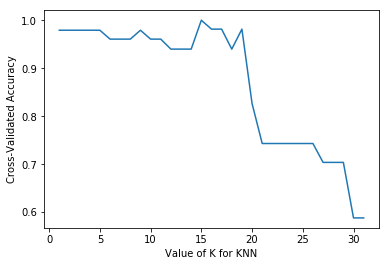

In [45]:
# Plot the scores by number of neighbors to see optimal k:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [46]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV


In [54]:
# Define the parameter values across which gridsearch will search
k_range = range(1, upper_k -1)

# Another parameter besides k that we might vary is the weights parameters
# uniform: (all points in the neighborhood are weighted equally)
# distance: (weights closer neighbors more heavily than further neighbors)

# we create a list for weights
weight_options = ['uniform', 'distance']

# Reinstantiate the Classifer
knn = KNeighborsClassifier()

# Create a parameter grid using a dictionary: map the parameter names to the values that should be searched
param_grid = {
    'n_neighbors':k_range,
    'weights' : weight_options
}

# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=True)

grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.97999999999999998

In [49]:
len(grid.cv_results_['mean_test_score'])

62

In [50]:
# View the complete results (it's a list of named tuples)
for i in range(0, 62):
    print(grid.cv_results_['mean_test_score'][i], grid.cv_results_['params'][i])

(0.93000000000000005, {'n_neighbors': 1, 'weights': 'uniform'})
(0.93000000000000005, {'n_neighbors': 1, 'weights': 'distance'})
(0.93000000000000005, {'n_neighbors': 2, 'weights': 'uniform'})
(0.93000000000000005, {'n_neighbors': 2, 'weights': 'distance'})
(0.93000000000000005, {'n_neighbors': 3, 'weights': 'uniform'})
(0.93000000000000005, {'n_neighbors': 3, 'weights': 'distance'})
(0.93000000000000005, {'n_neighbors': 4, 'weights': 'uniform'})
(0.93000000000000005, {'n_neighbors': 4, 'weights': 'distance'})
(0.94999999999999996, {'n_neighbors': 5, 'weights': 'uniform'})
(0.94999999999999996, {'n_neighbors': 5, 'weights': 'distance'})
(0.93999999999999995, {'n_neighbors': 6, 'weights': 'uniform'})
(0.93000000000000005, {'n_neighbors': 6, 'weights': 'distance'})
(0.94999999999999996, {'n_neighbors': 7, 'weights': 'uniform'})
(0.93000000000000005, {'n_neighbors': 7, 'weights': 'distance'})
(0.93999999999999995, {'n_neighbors': 8, 'weights': 'uniform'})
(0.93000000000000005, {'n_neighbo

In [51]:
grid.cv_results_

{'mean_fit_time': array([ 0.0005149 ,  0.0003353 ,  0.00037209,  0.00037901,  0.00032433,
         0.00051467,  0.00029302,  0.00042224,  0.0003953 ,  0.00030033,
         0.00033069,  0.0002989 ,  0.00035334,  0.00037201,  0.00031567,
         0.00040237,  0.00031463,  0.00031376,  0.00028626,  0.00027172,
         0.00028539,  0.00027235,  0.00031765,  0.00027013,  0.00026933,
         0.00030939,  0.00034404,  0.00030732,  0.00051268,  0.00027672,
         0.00027092,  0.00026941,  0.00027426,  0.00026957,  0.00028292,
         0.00027235,  0.00029604,  0.00028102,  0.00030573,  0.00026997,
         0.00029469,  0.00026997,  0.00029262,  0.00027092,  0.0003256 ,
         0.00030835,  0.00027045,  0.00027029,  0.00026997,  0.00027386,
         0.00028396,  0.00027339,  0.00042971,  0.00029135,  0.00031066,
         0.00036963,  0.00027704,  0.00033331,  0.00032234,  0.00033299,
         0.00029858,  0.00027108]),
 'mean_score_time': array([ 0.0007151 ,  0.00061695,  0.00082755,  0.00

# From Allie:
When we did the gridsearch, we looked at the best estimator and the best accuracy scores, across folds with more hyperparameters being tuned and found the k=15 was not necessarily the best on the training data. 

In [52]:
# Create a list of the mean scores using a list comprehension to loop through the cv_results_
grid_mean_scores = grid.cv_results_['mean_test_score']

Text(0,0.5,u'Cross-Validated Accuracy')

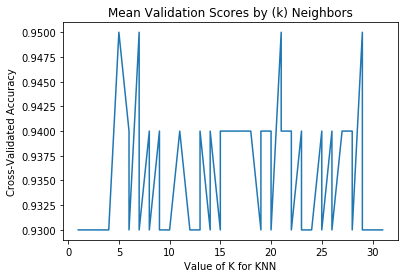

In [53]:
# We need a k_range that duplicates the k: [1, 1, 2, 3, ... 31, 31]: doubled_k_range 
doubled_k_range = []

for i in range(1, 32):
    doubled_k_range.append(i)
    doubled_k_range.append(i)
    
# Plot the results, identical to the one we generated above
plt.plot(doubled_k_range, grid_mean_scores)
plt.title('Mean Validation Scores by (k) Neighbors')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Find the "Best" Model 

* Considering the plot, is there only one model with the "best score"?
* What does that tell you about `grid.best_score_`?

In [228]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate the 'best' score
print(grid.best_params_)

# Actual KNN model object fit with those best parameters, including those not specified by gridsearch
print(grid.best_estimator_)

0.95
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


## BONUS:

* ### Is our model overfit? Discuss the bias - variance tradeoff in this classification model.